# **Importing necessary Libraries:**


In [0]:
!pip install scikit-learn-extra

     |████████████████████████████████| 624kB 2.9MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-learn-extra: filename=scikit_learn_extra-0.1.0b2-cp36-cp36m-linux_x86_64.whl size=342071 sha256=9b2a79068115a7b225ef8261f19ad9c02b446e86e5e0b38514db893120a55af4
  Stored in directory: /root/.cache/pip/wheels/04/01/0f/943bffb48bac048fa216b4325f1a6c939491ccb0ff500e08f4
Successfully built scikit-learn-extra


In [0]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
import seaborn as sns
sns.set() 
%matplotlib inline 

In [0]:

data = pd.read_csv("credit_card.csv")
df= data.copy()
print(df.shape)
df.head()

(8950, 9)


,CUST_ID,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE
0,C10001,40.900749,95.40,95.4,0.000000,1000.0,201.802084,139.509787,12
1,C10002,3202.467416,0.00,0.0,6442.945483,7000.0,4103.032597,1072.340217,12
2,C10003,2495.148862,773.17,0.0,0.000000,7500.0,622.066742,627.284787,12
3,C10004,1666.670542,1499.00,0.0,205.788017,7500.0,0.000000,312.343947,12
4,C10005,817.714335,16.00,0.0,0.000000,1200.0,678.334763,244.791237,12


# **Preprocessing:**

We will find the value containing NaN or missing values and will try to fill them with appropraite values.

In [0]:

df.isnull().sum()

CUST_ID                   0
BALANCE                   0
PURCHASES                 0
INSTALLMENTS_PURCHASES    0
CASH_ADVANCE              0
CREDIT_LIMIT              0
PAYMENTS                  0
MINIMUM_PAYMENTS          0
TENURE                    0
dtype: int64

Since, there are no as such null values, we will now observe the summary of this dataset.

In [0]:
df.describe()


,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,1003.204834,411.067645,978.871112,4494.282473,1733.143852,844.906767,11.517318
std,2081.531879,2136.634782,904.338115,2097.163877,3638.646702,2895.063757,2332.792322,1.338331
min,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,6.000000
25%,128.281915,39.635000,0.000000,0.000000,1600.000000,383.276166,170.857654,12.000000
50%,873.385231,361.280000,89.000000,0.000000,3000.000000,856.901546,312.343947,12.000000
75%,2054.140036,1110.130000,468.637500,1113.821139,6500.000000,1901.134317,788.713501,12.000000
max,19043.138560,49039.570000,22500.000000,47137.211760,30000.000000,50721.483360,76406.207520,12.000000


# **Feature Engineering:**
We will try to minimize the features and keep only that values that matters for clustering.

In [0]:
X= df.drop('CUST_ID', axis=1)

# **Normalizing the Values:**

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
ArraytobeScaled=scaler.fit_transform(X)
scaled=pd.DataFrame(columns=X.columns,data=ArraytobeScaled)

In [0]:
scaled.head()

,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE
0,0.002148,0.001945,0.00424,0.000000,0.031720,0.003979,0.001826,1.0
1,0.168169,0.000000,0.00000,0.136685,0.232053,0.080893,0.014034,1.0
2,0.131026,0.015766,0.00000,0.000000,0.248748,0.012264,0.008210,1.0
3,0.087521,0.030567,0.00000,0.004366,0.248748,0.000000,0.004088,1.0
4,0.042940,0.000326,0.00000,0.000000,0.038397,0.013374,0.003204,1.0


# **Testing the optimal number of clusters by Elbow Method and Silhoutte Score:**

In [0]:
cost = []
for k in range(1, 10):
    kmeanModel = KMedoids(n_clusters=k, random_state=0).fit(scaled)
    cost.append([k,kmeanModel.inertia_])

cost_medoid = []
for k in range(1, 10):
    kmedoidModel = KMeans(n_clusters=k, random_state=0).fit(scaled)
    cost_medoid.append([k,kmedoidModel.inertia_])

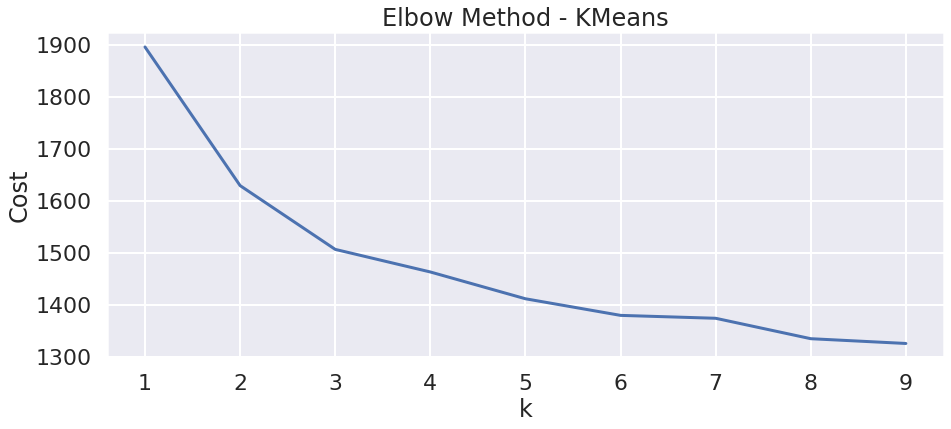

In [0]:
plt.figure(figsize=(15,6))
sns.set_context('poster')
plt.plot(pd.DataFrame(cost)[0], pd.DataFrame(cost)[1])
plt.xlabel('k')
plt.ylabel('Cost')
plt.title('Elbow Method - KMeans') 
plt.show()

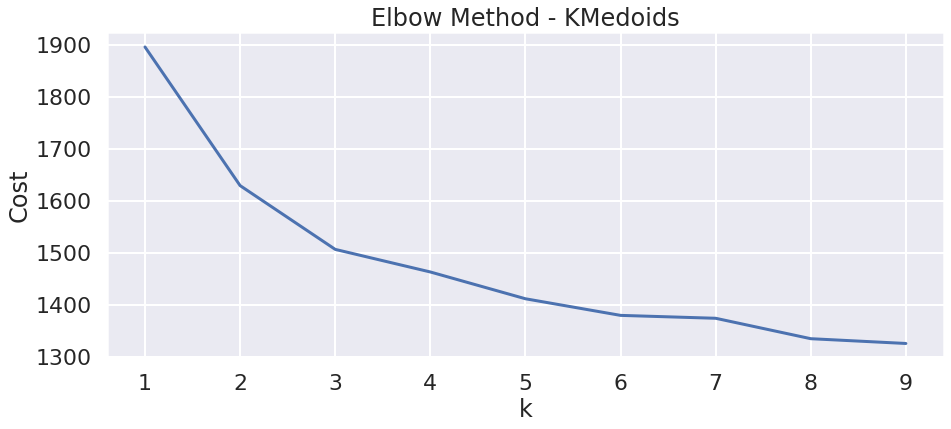

In [0]:
plt.figure(figsize=(15,6))
sns.set_context('poster')
plt.plot(pd.DataFrame(cost_medoid)[0], pd.DataFrame(cost)[1])
plt.xlabel('k')
plt.ylabel('Cost')
plt.title('Elbow Method - KMedoids') 
plt.show()

In [0]:
from sklearn.metrics import silhouette_score
silhouettescore = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled)
    silhouettescore.append([k, silhouette_score(scaled, kmeans.labels_)])

silhouettescore_medoid = []
for k in range(2, 10):
    kmedoids = KMedoids(n_clusters=k, random_state=0).fit(scaled)
    silhouettescore_medoid.append([k, silhouette_score(scaled, kmedoids.labels_)])

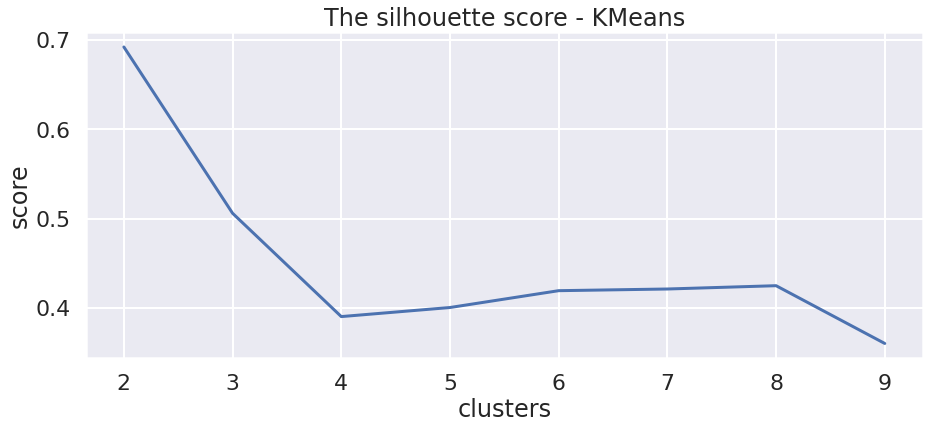

In [0]:
plt.figure(figsize=(15,6))
sns.set_context('poster')
plt.plot( pd.DataFrame(silhouettescore)[0], pd.DataFrame(silhouettescore)[1])
plt.xlabel('clusters')
plt.ylabel('score')
plt.title('The silhouette score - KMeans') 
plt.show()

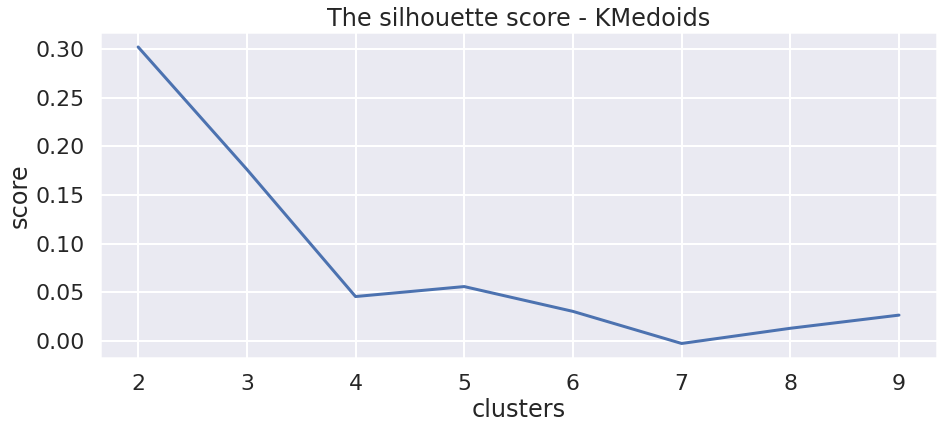

In [0]:
plt.figure(figsize=(15,6))
sns.set_context('poster')
plt.plot( pd.DataFrame(silhouettescore_medoid)[0], pd.DataFrame(silhouettescore_medoid)[1])
plt.xlabel('clusters')
plt.ylabel('score')
plt.title('The silhouette score - KMedoids') 
plt.show()

.

***From the graphs plotted above 3 clusters seems to be a reasonable choice.***

.

In [0]:
pred = X.copy()

kmean = KMeans(n_clusters=3, random_state=0)
kmean.fit(scaled)
pred['kmean'] = kmean.labels_
print(pred['kmean'].value_counts())


pred_medoid = X.copy()

kmedoids = KMedoids(n_clusters=3, random_state=0)
kmedoids.fit(scaled)
pred_medoid['kmedoid'] = kmedoids.labels_
print(pred_medoid['kmedoid'].value_counts())


pred_AGNES = X.copy()

ward = AgglomerativeClustering(n_clusters=3)
AGNES = ward.fit_predict(scaled)
pred_AGNES['AGNES'] = AGNES

print(pred_AGNES['AGNES'].value_counts())




0    6479
2    1707
1     764
Name: kmean, dtype: int64
2    5079
0    2211
1    1660
Name: kmedoid, dtype: int64
0    7101
2    1229
1     620
Name: AGNES, dtype: int64


In [0]:
pred.head()

,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE,kmean
0,40.900749,95.40,95.4,0.000000,1000.0,201.802084,139.509787,12,0
1,3202.467416,0.00,0.0,6442.945483,7000.0,4103.032597,1072.340217,12,2
2,2495.148862,773.17,0.0,0.000000,7500.0,622.066742,627.284787,12,2
3,1666.670542,1499.00,0.0,205.788017,7500.0,0.000000,312.343947,12,0
4,817.714335,16.00,0.0,0.000000,1200.0,678.334763,244.791237,12,0


In [0]:
pred_medoid.head()

,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE,kmedoid
0,40.900749,95.40,95.4,0.000000,1000.0,201.802084,139.509787,12,2
1,3202.467416,0.00,0.0,6442.945483,7000.0,4103.032597,1072.340217,12,1
2,2495.148862,773.17,0.0,0.000000,7500.0,622.066742,627.284787,12,0
3,1666.670542,1499.00,0.0,205.788017,7500.0,0.000000,312.343947,12,0
4,817.714335,16.00,0.0,0.000000,1200.0,678.334763,244.791237,12,2


In [0]:
pred_AGNES.head()

,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE,AGNES
0,40.900749,95.40,95.4,0.000000,1000.0,201.802084,139.509787,12,0
1,3202.467416,0.00,0.0,6442.945483,7000.0,4103.032597,1072.340217,12,2
2,2495.148862,773.17,0.0,0.000000,7500.0,622.066742,627.284787,12,0
3,1666.670542,1499.00,0.0,205.788017,7500.0,0.000000,312.343947,12,0
4,817.714335,16.00,0.0,0.000000,1200.0,678.334763,244.791237,12,0


# **Analysis:**
> We will be performing the following operations in this section:
>
>* Analysis
>* Visulizations
>* Discussion
>
> ## **Analysis**
>>  Printing the Dataframes with values grouped by each cluster. We will have the means of the values against each cluster.
>
> ## **Visualization**
>>  We will be plotting each cluster from each method and observe how the clusters differ. Radar Graph from Plotly is a great method for such visualizations.
>
> ## **Discussion**
>>  Once the graphs have been plotted we will discuss the variance in each cluster and how the minor differences exist in each method.


In [0]:
!pip install plotly
!pip install chart_studio

In [0]:
p_ = pred.copy()
pivoted = p_.groupby('kmean')["BALANCE", "PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS","TENURE"].mean().reset_index()
pivoted


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,kmean,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE
0,0,867.278654,767.259701,349.398734,507.787037,3257.187877,1240.087018,600.376747,11.893193
1,1,1063.335094,467.436675,188.985340,1387.233009,2860.410122,802.664064,415.190075,7.446335
2,2,4435.010719,2138.538981,744.532056,2584.123154,9921.004420,4021.018359,1965.359931,11.912712


In [0]:
p_ = pred_medoid.copy()
pivoted_medoid = p_.groupby('kmedoid')["BALANCE", "PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS","TENURE"].mean().reset_index()
pivoted_medoid

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,kmedoid,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE
0,0,654.860541,1475.188878,580.921217,426.045346,6917.238418,1905.803752,309.646394,11.785165
1,1,5040.642556,1934.104922,687.810777,3086.650020,8812.020811,3945.360785,2229.501869,11.687349
2,2,824.313134,493.488183,246.677047,530.630274,2028.324364,934.949100,625.381823,11.345147


In [0]:
p_ = pred_AGNES.copy()
pred_AGNES = p_.groupby('AGNES')["BALANCE", "PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS","TENURE"].mean().reset_index()
pred_AGNES

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,AGNES,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE
0,0,907.922272,927.558726,399.210851,534.239847,3820.321587,1413.171257,563.123311,11.825236
1,1,1190.676776,455.581452,174.873113,1532.940913,3002.774194,811.307170,436.039417,7.085484
2,2,5546.520793,1716.540480,598.728918,3268.377493,9140.768548,4046.947057,2679.277860,11.973963


In [0]:
import chart_studio as plotly
#plotly.tools.set_credentials_file(username='SameedAhmedKhan', api_key='XXXXXXXX')

In [0]:
import chart_studio.plotly as py
import plotly.graph_objs as go

In [0]:
radar_data = [
    go.Scatterpolar(
      r = list(pivoted.loc[0,["BALANCE", "PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS","TENURE"]]),
      theta = ["BALANCE", "PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS","TENURE"],
      fill = None,
      fillcolor=None,
      name = 'First Cluster KMEANS'
    ),
    go.Scatterpolar(
      r = list(pivoted.loc[1,["BALANCE", "PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS","TENURE"]]),
      theta = ["BALANCE", "PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS","TENURE"],
      fill = None,
      fillcolor=None,
      name = 'Second Cluster KMEANS'
    ),
    go.Scatterpolar(
      r = list(pivoted.loc[2,["BALANCE", "PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS","TENURE"]]),
      theta = ["BALANCE", "PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS","TENURE"],
      fill = None,
      fillcolor=None,
      name = 'Third Cluster KMEANS'
    )
]

In [0]:
radar_data_medoid = [
    go.Scatterpolar(
      r = list(pivoted_medoid.loc[0,["BALANCE", "PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS","TENURE"]]),
      theta = ["BALANCE", "PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS","TENURE"],
      fill = None,
      fillcolor=None,
      name = 'First Cluster KMEDOIDS'
    ),
    go.Scatterpolar(
      r = list(pivoted_medoid.loc[1,["BALANCE", "PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS","TENURE"]]),
      theta = ["BALANCE", "PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS","TENURE"],
      fill = None,
      fillcolor=None,
      name = 'Second Cluster KMEDOIDS'
    ),
    go.Scatterpolar(
      r = list(pivoted_medoid.loc[2,["BALANCE", "PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS","TENURE"]]),
      theta = ["BALANCE", "PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS","TENURE"],
      fill = None,
      fillcolor=None,
      name = 'Third Cluster KMEDOIDS'
    )
]

In [0]:
radar_data_AGNES = [
    go.Scatterpolar(
      r = list(pred_AGNES.loc[0,["BALANCE", "PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS","TENURE"]]),
      theta = ["BALANCE", "PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS","TENURE"],
      fill = None,
      fillcolor=None,
      name = 'First Cluster AGNES'
    ),
    go.Scatterpolar(
      r = list(pred_AGNES.loc[1,["BALANCE", "PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS","TENURE"]]),
      theta = ["BALANCE", "PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS","TENURE"],
      fill = None,
      fillcolor=None,
      name = 'Second Cluster AGNES'
    ),
    go.Scatterpolar(
      r = list(pred_AGNES.loc[2,["BALANCE", "PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS","TENURE"]]),
      theta = ["BALANCE", "PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS","TENURE"],
      fill = None,
      fillcolor=None,
      name = 'Third Cluster AGNES'
    )
]

In [0]:
radar_layout = go.Layout(polar = dict(radialaxis = dict(visible = True,range = [0, 11000])), showlegend = True)

In [0]:
fig = go.Figure(data=radar_data, layout=radar_layout)
py.iplot(fig, filename = "radar")

In [0]:
fig = go.Figure(data=radar_data_medoid, layout=radar_layout)
py.iplot(fig, filename = "radar")

In [0]:
fig = go.Figure(data=radar_data_AGNES, layout=radar_layout)
py.iplot(fig, filename = "radar")

**We can derive the following conclusions:**
>
>
>*   The major factors in forming the clusters according to AGNES and K Medoids are:
>>***1.   Credit Limit***
>>
>>***2.   Payments***
>>
>>***2.   Purchases***
>*   We can classify the clusters as:
>>***1.   Premium Users:***
>>>This category of users are observed to have extermely high Credit Limit and make a lot of Payments. They are around 1/6th of all the users. Usually the business owners who have to make usual and high payments fall in this group.
>>
>>***2.   Standard Users***
>>>These users are highest in number and may include the normal people who do mediocre jobs and make usual and average transactions. However, they may have higher credit limits according to tale Medoid clustering tells.
>>
>>***3.   Basic Users***
>>>This includes the users who rarely make use of their credit cards and usually have low balance and credit limit. Consequently, their payments are less and tenure doesnot lasts long. This may include students and people who are more dependent on paper money like normal shopkeepers. They also do not keep advance cash.
>>